# EDA of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Load given dataset
data = pd.read_csv('Corona.csv')
df=data.dropna()

In [4]:
df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,"Me, ready to go at supermarket during the #COV...",Extremely Negative
2,Was at the supermarket today. Didn't buy toile...,Neutral
3,All month there hasn't been crowding in the su...,Neutral
4,"Due to the Covid-19 situation, we have increas...",Extremely Positive
...,...,...
2412,"Oil prices at 2002 already, are we back almost...",Neutral
2413,Why is Government not transmitting benefits of...,Positive
2414,"""As long as we're not seeing markets I would c...",Extremely Positive
2415,Will school fees be refunded if the #coronavir...,Neutral


In [ ]:
df.head()

In [5]:
df.columns

Index(['OriginalTweet', 'Sentiment'], dtype='object')

In [6]:
df.groupby('Sentiment').describe()

OriginalTweet         \
                           count unique   
Sentiment                                 
Extremely Negative           770    770   
Extremely Positive           738    738   
Negative                     315    315   
Neutral                      479    479   
Positive                     115    115   

                                                                            
                                                                  top freq  
Sentiment                                                                   
Extremely Negative  Me, ready to go at supermarket during the #COV...    1  
Extremely Positive  Due to the Covid-19 situation, we have increas...    1  
Negative            There is no evidence that #Covid19 will cause ...    1  
Neutral             @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...    1  
Positive            ? Gucci is temporarily closing all of its stor...    1

Text(0.5, 1.0, 'Distribution of Sentiment ')

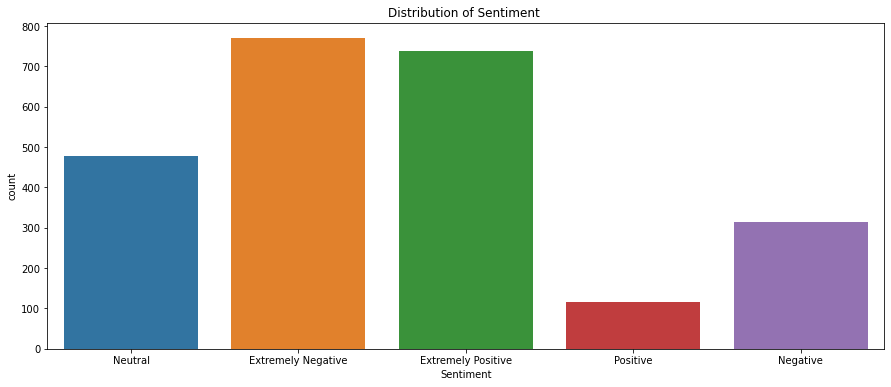

In [7]:
#plotting graph for distribution
plt.figure(figsize=(15,6))
sns.countplot(x = "Sentiment", data = df)
df.loc[:, 'Sentiment'].value_counts()
plt.title('Distribution of Sentiment ')

In [8]:
df['Sentiment'].unique()

array(['Neutral', 'Extremely Negative', 'Extremely Positive', 'Positive',
       'Negative'], dtype=object)

Training model:

In [9]:
#!pip install nltk

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SPIRO11\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['OriginalTweet']=df['OriginalTweet'].str.strip()
# lowercase the text
df['OriginalTweet'] = df['OriginalTweet'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['OriginalTweet']=df['OriginalTweet'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['OriginalTweet'].split(' '),axis=1)
# removing stopwords
df['OriginalTweet'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['OriginalTweet']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [12]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in df['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1
    
print(vocab)

defaultdict(<class 'int'>, {'menyrbi': 1, 'philgahan': 1, 'chrisitv': 1, 'httpstcoifz9fan2pa': 1, 'httpstcoxx6ghgfzcc': 1, 'httpstcoi2nlzdxno8': 1, 'readi': 13, 'go': 280, 'supermarket': 361, 'covid19': 846, 'outbreak\r\r\n\r\r\nnot': 1, 'im': 59, 'paranoid': 1, 'food': 606, 'stock': 210, 'litterali': 1, 'empti': 74, 'coronaviru': 1023, 'seriou': 12, 'thing': 85, 'pleas': 118, 'dont': 61, 'panic': 337, 'caus': 35, 'shortage\r\r\n\r\r\ncoronavirusfr': 1, 'restezchezv': 1, 'stayathom': 6, 'confin': 2, 'httpstcousmualq72n': 1, 'today': 85, 'didnt': 10, 'buy': 333, 'toilet': 108, 'paper': 97, 'rebel\r\r\n\r\r\ntoiletpapercrisi': 1, 'httpstcoevxkqlidaz': 1, 'month': 32, 'hasnt': 5, 'crowd': 31, 'restaur': 52, 'howev': 5, 'reduc': 17, 'hour': 84, 'close': 117, 'mall': 8, 'mean': 39, 'everyon': 88, 'use': 69, 'entranc': 1, 'depend': 3, 'singl': 14, 'manila': 2, 'lockdown': 29, 'covid2019': 285, 'philippin': 3, 'httpstcohxws9lanf9': 1, 'due': 140, 'situat': 40, 'increas': 68, 'demand': 98, 'pr

In [13]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'OriginalTweet':],df['Sentiment'],test_size=0.2)

In [14]:
#!pip install wordcloud

Text(0.5, 1.0, '')

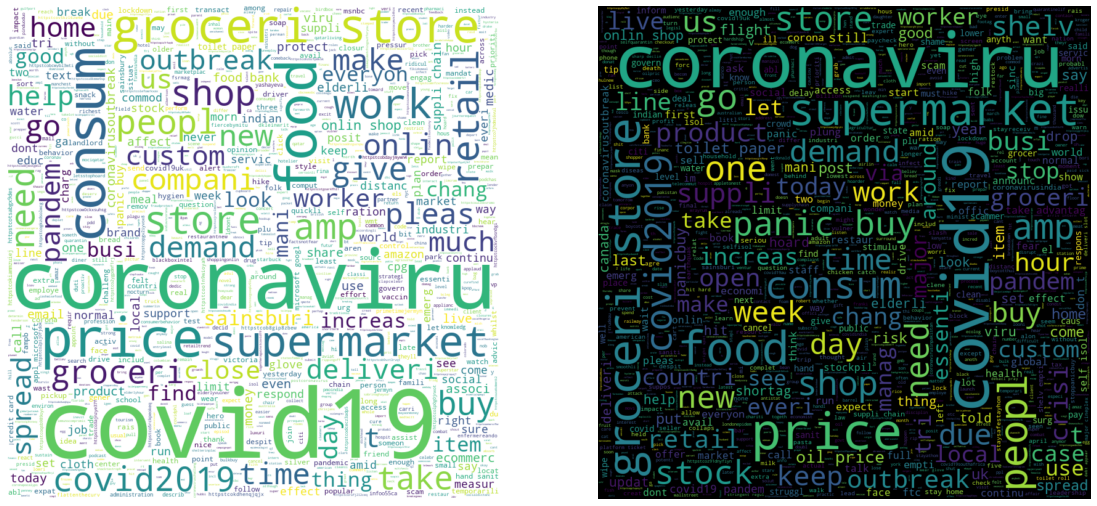

In [15]:
from wordcloud import WordCloud

ham=' '.join(X.loc[y=='Positive','final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(ham)

spam=' '.join(X.loc[y=='Negative','final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(spam)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')



In [16]:
df.loc[:,'OriginalTweet':]

,OriginalTweet,Sentiment,word_tokens,stemmed,final_text
0,"[menyrbie, philgahan, chrisitv, httpstcoifz9fa...",Neutral,"[menyrbie, philgahan, chrisitv, httpstcoifz9fa...","[menyrbi, philgahan, chrisitv, httpstcoifz9fan...",menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1,"[ready, go, supermarket, covid19, outbreak\r\r...",Extremely Negative,"[me, ready, to, go, at, supermarket, during, t...","[readi, go, supermarket, covid19, outbreak\r\r...",readi go supermarket covid19 outbreak\r\r\n\r\...
2,"[supermarket, today, didnt, buy, toilet, paper...",Neutral,"[was, at, the, supermarket, today, didnt, buy,...","[supermarket, today, didnt, buy, toilet, paper...",supermarket today didnt buy toilet paper rebel...
3,"[month, hasnt, crowding, supermarkets, restaur...",Neutral,"[all, month, there, hasnt, been, crowding, in,...","[month, hasnt, crowd, supermarket, restaur, ho...",month hasnt crowd supermarket restaur howev re...
4,"[due, covid19, situation, increased, demand, f...",Extremely Positive,"[due, to, the, covid19, situation, we, have, i...","[due, covid19, situat, increas, demand, food, ...",due covid19 situat increas demand food product...
...,...,...,...,...,...
2412,"[oil, prices, 2002, already, back, almost, 20,...",Neutral,"[oil, prices, at, 2002, already, are, we, back...","[oil, price, 2002, alreadi, back, almost, 20, ...",oil price 2002 alreadi back almost 20 year due...
2413,"[government, transmitting, benefits, fall, cru...",Positive,"[why, is, government, not, transmitting, benef...","[govern, transmit, benefit, fall, crud, oil, p...",govern transmit benefit fall crud oil price me...
2414,"[long, seeing, markets, would, call, control, ...",Extremely Positive,"[as, long, as, were, not, seeing, markets, i, ...","[long, see, market, would, call, control, keep...",long see market would call control keep open i...
2415,"[school, fees, refunded, coronavirus, causes, ...",Neutral,"[will, school, fees, be, refunded, if, the, co...","[school, fee, refund, coronaviru, caus, closur...",school fee refund coronaviru caus closures\r\r...
